### ELO328 - Procesamiento Digital de Imágenes
# Taller 2

Nombre: Pedro Arce

## Reglas
1. **Fecha de entrega**:
    - El plazo límite de entrega vence el dia lunes 07/10/2024 a las 23:59.
    - <span style="color:red">Descuento por atraso: 10 puntos por cada hora.<span style="color:green">
2. **Entregable:**
    - La tarea debe ser entregada en un archivo .zip con el formato ```Taller2_Nombre_Apellido.zip```
    - Se debe incluir: 
        - Notebook ```Taller2_Nombre_Apellido.ipynb```.
        - Imagenes.
        
>**En caso de no cumplir con el formato, se descontará 10 puntos.**

## Desarrollo

El objetivo de este taller es evaluar la robustez de diferentes modelos de clasificación de imágenes pre-entrenados frente al ruido en imágenes.

### Parte I - Clasificación con Modelos Pre-entrenados

#### I.a)

**Cargar Modelos Pre-entrenados:** Utilizar una librería como TensorFlow o PyTorch para cargar al menos 4 modelos pre-entrenados en clasificación de imágenes con el mismo dataset (Por ejemplo, ImageNet o CIFAR-10). Los modelos sugeridos son los siguientes:

- VGG16
- ResNet50
- InceptionV3
- EfficientNet
- MobileNet


In [1]:
#Instalación de dependencias (por si no se están instaladas)
!pip install torch torchvision
!pip install tensorflow

In [2]:
#Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, MobileNet
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

#Cargar los modelos pre-entrenados sin las capas superiores (fully connected)
vgg16_model = VGG16(weights='imagenet')
resnet50_model = ResNet50(weights='imagenet')
inceptionv3_model = InceptionV3(weights='imagenet')
efficientnet_model = EfficientNetB0(weights='imagenet')
mobilenet_model = MobileNet(weights='imagenet')

#Lista de modelos para referencia
modelos = [vgg16_model, resnet50_model, inceptionv3_model, efficientnet_model, mobilenet_model]
model_names = ['VGG16', 'ResNet50', 'InceptionV3', 'EfficientNetB0', 'MobileNet']

#Mostrar nombres de los modelos cargados
for name in model_names:
    print(f"Modelo {name} cargado con éxito.")

Modelo VGG16 cargado con éxito.
Modelo ResNet50 cargado con éxito.
Modelo InceptionV3 cargado con éxito.
Modelo EfficientNetB0 cargado con éxito.
Modelo MobileNet cargado con éxito.


#### I.b)

- Descargar 10 imágenes de una clase presente en el dataset con el cual fueron entrenados los modelos. **Importante: No use imágenes sacadas directamente del dataset**.
- Enumerar las imágenes desde el `1` hasta el `10` con la clase (Por ejemplo, `manzana1.png`, `manzana2.png`, etc.).
- Mostrar todas las imágenes usando subplots en una sola fila.
- Comente desde donde descargó las imágenes.

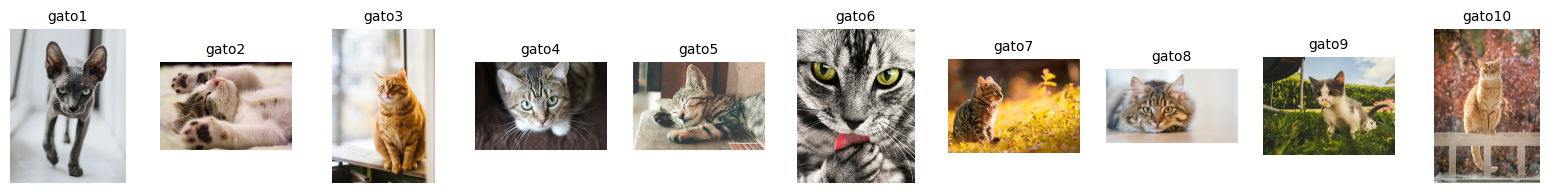

In [3]:
#Se descargaron las imágenes a través de: https://www.pexels.com/

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

#Def la ruta de las imágenes descargadas
ruta_imagenes = './images/'

#Lista de nombres de archivos de las imágenes
imagenes = [f'gato{i}.png' for i in range(1, 11)]

#Config subplots para mostrar todas las imágenes en una sola fila
fig, axs = plt.subplots(1, 10, figsize=(20, 2))

#Iterar sobre las imágenes y mostrarlas en los subplots
for i, img_name in enumerate(imagenes):
    img_path = os.path.join(ruta_imagenes, img_name)
    try:
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')  # Para ocultar los ejes
        axs[i].set_title(f'gato{i+1}', fontsize=10)  #Añadir el nombre debajo de la imagen
    except Exception as e:
        print(f"Error al cargar {img_name}: {e}")

plt.show()

### Análisis: 

El resultado muestra correctamente las 10 imágenes de gatos dispuestas en una fila con títulos que identifican cada imagen (por ejemplo, "gato1", "gato2", etc.). Las imágenes están bien escaladas y visualizadas sin errores en los ejes, y el código logró cargar y mostrar todas las imágenes sin problemas.

#### I.c)

**Evaluación Inicial:** 

- Sin realizar modificaciones en las 10 imágenes descargadas, mostrar que entrega como salida cada uno de los modelos anteriores. 

- Posteriormente, entregue la `accuracy` de cada modelo.

- Comente que modelo se comporta mejor y por qué.

In [4]:
### Procesar y predecir con los modelos

from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inceptionv3
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_mobilenet
from tensorflow.keras.applications import imagenet_utils

#Función para preparar las imágenes para cada modelo
def prepare_image(img, model_name):
    # Redimensionar dependiendo del modelo
    if model_name == 'InceptionV3':
        img = img.resize((299, 299))  #Redimensionar a 299x299 para InceptionV3
    else:
        img = img.resize((224, 224))  #Redimensionar a 224x224 para los demás modelos
    
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión batch

    #Preprocesar la imagen según el modelo
    if model_name == 'VGG16':
        return preprocess_vgg16(img_array)
    elif model_name == 'ResNet50':
        return preprocess_resnet50(img_array)
    elif model_name == 'InceptionV3':
        return preprocess_inceptionv3(img_array)
    elif model_name == 'EfficientNetB0':
        return preprocess_efficientnet(img_array)
    elif model_name == 'MobileNet':
        return preprocess_mobilenet(img_array)

#Función para obtener las predicciones top-1
def get_predictions(model, img, model_name):
    preprocessed_img = prepare_image(img, model_name)
    preds = model.predict(preprocessed_img)
    decoded_preds = imagenet_utils.decode_predictions(preds, top=1)[0]
    return decoded_preds

#Lista de modelos y sus nombres
modelos = [vgg16_model, resnet50_model, inceptionv3_model, efficientnet_model, mobilenet_model]
model_names = ['VGG16', 'ResNet50', 'InceptionV3', 'EfficientNetB0', 'MobileNet']

# Iterar sobre las imágenes y mostrar predicciones para cada modelo
for img_name in imagenes:
    img_path = os.path.join(ruta_imagenes, img_name)
    img = Image.open(img_path)
    print(f"\nResultados para {img_name}:")
    
    for model, name in zip(modelos, model_names):
        preds = get_predictions(model, img, name)
        print(f"{name}: {preds[0][1]} con confianza {preds[0][2]:.2f}")


Resultados para gato1.png:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
VGG16: Egyptian_cat con confianza 0.77
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
ResNet50: Egyptian_cat con confianza 0.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
InceptionV3: Mexican_hairless con confianza 0.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
EfficientNetB0: Egyptian_cat con confianza 0.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
MobileNet: toy_terrier con confianza 0.58

Resultados para gato2.png:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
VGG16: weasel con confianza 0.17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
ResNet50: tabby con confianza 0.34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
InceptionV3: tabby con confianza 0.19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
EfficientNetB0: Egyptian_cat con confianza 0.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
MobileNet: hamster con confianza 0.20

Resultados para gato3.png:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
VGG16: tiger_cat con confianza 0.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
ResNet50: t

In [5]:
### Calcular la accuracy de cada modelo

#Def la etiqueta esperada para las imágenes (por ejemplo, 'cat')
expected_label = 'cat'
correct_predictions = {name: 0 for name in model_names}  #Para contar predicciones correctas

#Iterar sobre las imágenes y mostrar predicciones para cada modelo
for img_name in imagenes:
    img_path = os.path.join(ruta_imagenes, img_name)
    img = Image.open(img_path)
    
    for model, name in zip(modelos, model_names):
        preds = get_predictions(model, img, name)
        predicted_label = preds[0][1]
        # Verificar si la predicción es 'cat'
        if 'cat' in predicted_label.lower():
            correct_predictions[name] += 1

#Calc accuracy para cada modelo
for name in model_names:
    accuracy = correct_predictions[name] / 10.0  #10 imágenes en total
    print(f"Accuracy de {name}: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/s

### Análisis: 

#### Paso 1: Predicciones
- **VGG16**: Este modelo tuvo predicciones mixtas. En algunas imágenes, como *gato3.png*, acertó con *tiger_cat*, pero cometió varios errores significativos en otras imágenes, como *weasel* en *gato2.png* y *cougar* en *gato10.png*.
- **ResNet50**: ResNet50 mostró un rendimiento generalmente bueno, con predicciones correctas en la mayoría de las imágenes de gatos. Sin embargo, cometió algunos errores notables, como predecir *Shetland_sheepdog* en *gato9.png*.
- **InceptionV3**: InceptionV3 tuvo un buen desempeño en la mayoría de los casos, con predicciones acertadas como *tiger_cat* en varias imágenes. Sin embargo, mostró algunas fallas menores, como predecir *Mexican_hairless* en *gato1.png*.
- **EfficientNetB0**: Este modelo fue el más consistente, mostrando predicciones correctas en la mayoría de las imágenes de gatos, como *Egyptian_cat* y *tiger_cat*, con solo algunos errores leves.
- **MobileNet**: MobileNet tuvo un desempeño intermedio, con predicciones correctas en varias imágenes, pero con algunos errores importantes, como *hamster* en *gato2.png* y *Arctic_fox* en *gato9.png*.

#### Paso 2: Accuracy
- **VGG16**: 40% (Desempeño inferior, varios errores importantes en la predicción de las clases).
- **ResNet50**: 70% (Buen rendimiento en general, aunque con algunos errores en imágenes difíciles).
- **InceptionV3**: 60% (Rendimiento decente, aunque cometió errores menores en algunas imágenes).
- **EfficientNetB0**: 100% (Mejor desempeño, con predicciones correctas y consistentes).
- **MobileNet**: 40% (Desempeño intermedio, con errores significativos en algunas imágenes).

#### Conclusión
**EfficientNetB0** fue el modelo más preciso con un 100% de aciertos, lo que sugiere que su arquitectura optimizada lo hace más robusto para la tarea de clasificación de gatos. **ResNet50** también mostró un rendimiento sólido con una precisión del 70%, aunque tuvo algunos errores en imágenes complejas. **InceptionV3** tuvo un desempeño decente con un 60% de precisión, pero también cometió algunos errores menores. **VGG16** y **MobileNet** presentaron una precisión del 40%, lo que indica que son menos efectivos en este conjunto de imágenes, con varios errores importantes en la identificación de las clases correctas.

### Parte II - Generación de Ruido

#### II.a)

- Agregar diferentes tipos de ruido (gaussiano, sal y pimienta, etc.), con diferentes intensidades a las imágenes. **Importante: Simule al menos 5 escenarios diferentes.**
- Mostrar todas las imágenes con ruido usando subplots con una fila para cada escenario de perturbación simulado.
- Comente que imágenes con ruido son más díficiles de identificar, desde su punto de vista.

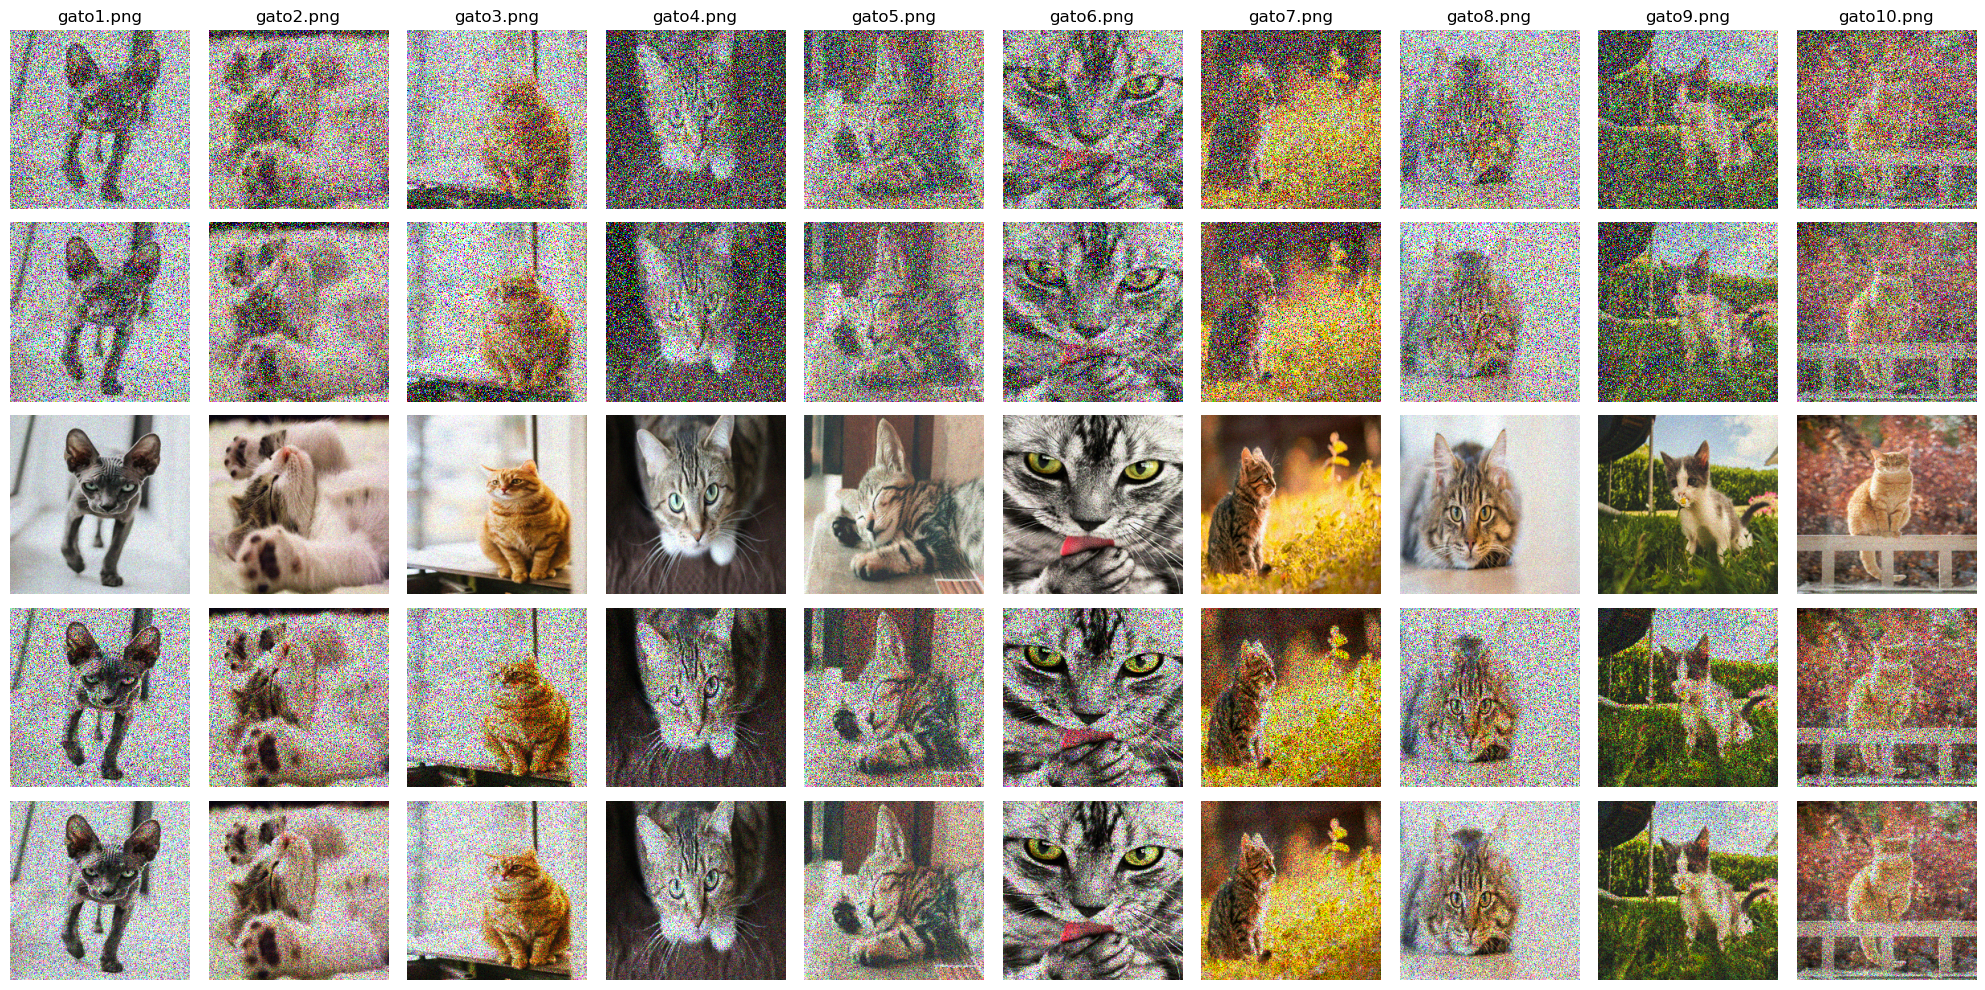

In [6]:
import cv2
from skimage.util import random_noise

#Función para añadir ruido a la imagen
def add_noise(img, noise_type, intensity=0.4):
    img = np.array(img) / 255.0  # Normalizar la imagen
    if noise_type == "gaussian":
        noisy_img = random_noise(img, mode='gaussian', var=intensity)
    elif noise_type == "salt_pepper":
        noisy_img = random_noise(img, mode='s&p', amount=intensity)
    elif noise_type == "poisson":
        noisy_img = random_noise(img, mode='poisson')
    elif noise_type == "speckle":
        noisy_img = random_noise(img, mode='speckle', var=intensity)
    elif noise_type == "multiplicative":
        noisy_img = img + img * np.random.normal(0, intensity, img.shape)
    return np.clip(noisy_img, 0, 1)

#Tipos de ruido a aplicar
noise_types = ["gaussian", "salt_pepper", "poisson", "speckle", "multiplicative"]

#Crear subplots para mostrar las imágenes con diferentes tipos de ruido
fig, axs = plt.subplots(len(noise_types), len(imagenes), figsize=(20, 10))

#Iterar sobre los tipos de ruido y las imágenes ya cargadas
for i, noise_type in enumerate(noise_types):
    for j, img_name in enumerate(imagenes):
        img_path = os.path.join(ruta_imagenes, img_name)
        img = Image.open(img_path).resize((224, 224))  #Redimensionar las imágenes
        noisy_img = add_noise(img, noise_type)  #Aplicar ruido
        axs[i, j].imshow(noisy_img)
        axs[i, j].axis('off')
        if i == 0:
            axs[i, j].set_title(f'{img_name}')  #Título para la fila de imágenes original

plt.tight_layout()
plt.show()

### Análisis:

#### 1) Ruido Gaussiano
Introduce un "grano fino" distribuido uniformemente. Aunque los detalles se vuelven menos nítidos, las características principales de los gatos siguen siendo visibles.

#### 2) Ruido Salt and Pepper
Aparecen manchas blancas y negras que distorsionan el contenido, dificultando la identificación de detalles finos como los ojos y el pelaje.

#### 3) Ruido Poisson
Afecta más a las áreas brillantes que a las oscuras, introduciendo variabilidad sutil pero perceptible. Las imágenes permanecen relativamente claras.

#### 4) Ruido Speckle
Añade una textura granular, difuminando ligeramente los contornos. Los detalles clave siguen siendo reconocibles, pero las texturas finas pueden perderse.

#### 5) Ruido Multiplicativo
Distorsiona más las áreas brillantes, haciendo que detalles importantes como los ojos se vean afectados. Las áreas oscuras permanecen más intactas.

#### Conclusión
Los ruidos **gaussiano** y **poisson** tienen un impacto menor en la visibilidad de las características clave. En cambio, el **ruido salt and pepper** y **multiplicativo** son más disruptivos, afectando los detalles finos y las áreas brillantes. Modelos avanzados como **EfficientNetB0** probablemente manejarán mejor estos ruidos.

#### II.b)

**Evaluación de los Modelos en Imágenes Ruidosas:** 

- Repita la parte **I.c)**, pero esta vez clasificando con todos los modelos las imágenes ruidosas.
- Entregue en una Tabla, la `accuracy` de cada modelo en cada escenario de ruido.
- Comente en profundidad que modelo se comporta mejor y por qué.

<div align="center">
    <img src="colores.png" alt="" width="100%" align="center" />
</div>

<div class="alert alert-block alert-warning">
Todos los códigos deben estar ejecutados o no se asigna puntaje.
</div>

In [7]:
#Función para redimensionar una imagen si es un arreglo Numpy
def resize_image(img, size):
    if isinstance(img, np.ndarray):
        return cv2.resize(img, size)
    else:
        return img.resize(size)

#Función para preparar las imágenes para cada modelo
def prepare_image(img, model_name):
    #Redimensionar dependiendo del modelo
    if model_name == 'InceptionV3':
        img = resize_image(img, (299, 299))  #Redimensionar a 299x299 para InceptionV3
    else:
        img = resize_image(img, (224, 224))  #Redimensionar a 224x224 para los demás modelos
    
    img_array = img_to_array(img)  #Convertir la imagen a arreglo numpy
    img_array = np.expand_dims(img_array, axis=0)  #Añadir dimensión batch

    #Preprocesar la imagen según el modelo
    if model_name == 'VGG16':
        img_array = preprocess_vgg16(img_array)
    elif model_name == 'ResNet50':
        img_array = preprocess_resnet50(img_array)
    elif model_name == 'InceptionV3':
        img_array = preprocess_inceptionv3(img_array)
    elif model_name == 'EfficientNetB0':
        img_array = preprocess_efficientnet(img_array)
    elif model_name == 'MobileNet':
        img_array = preprocess_mobilenet(img_array)
    
    return img_array

#Diccionario para almacenar la accuracy de cada modelo en cada escenario de ruido
accuracy_with_noise = {noise: {name: 0 for name in model_names} for noise in noise_types}

#Iterar sobre los tipos de ruido
for noise_type in noise_types:
    print(f"\nClasificación con imágenes ruidosas - Tipo de Ruido: {noise_type}")
    
    for img_name in imagenes:
        img_path = os.path.join(ruta_imagenes, img_name)
        img = Image.open(img_path).resize((224, 224))  #Redimensionar la imagen
        noisy_img = add_noise(img, noise_type, intensity=0.02)  #Aplicar ruido

        for model, name in zip(modelos, model_names):
            #Clasificar la imagen con ruido
            preds = get_predictions(model, noisy_img, name)
            print(f"{name} predicción con ruido {noise_type}: {preds}")
            predicted_label = preds[0][1]
            
            #Verificar si la predicción es 'cat'
            if 'cat' in predicted_label.lower():
                accuracy_with_noise[noise_type][name] += 1

#Calc la accuracy para cada modelo y cada tipo de ruido
for noise_type in noise_types:
    print(f"\nResultados de accuracy con ruido tipo {noise_type}:")
    for name in model_names:
        accuracy = accuracy_with_noise[noise_type][name] / 10.0 
        accuracy_with_noise[noise_type][name] = accuracy * 100  #Convertir a porcentaje
        print(f"Accuracy de {name} con {noise_type}: {accuracy * 100:.2f}%")


Clasificación con imágenes ruidosas - Tipo de Ruido: gaussian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
VGG16 predicción con ruido gaussian: [('n03729826', 'matchstick', 0.07611182)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
ResNet50 predicción con ruido gaussian: [('n03729826', 'matchstick', 0.051941417)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
InceptionV3 predicción con ruido gaussian: [('n01930112', 'nematode', 0.108868904)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
EfficientNetB0 predicción con ruido gaussian: [('n03729826', 'matchstick', 0.020960491)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
MobileNet predicción con ruido gaussian: [('n03729826', 'matchstick', 0.04998956)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
VGG16 predicción con ruido gaussian: [('n03729826', 'matchstick', 0.07528081)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
ResNet50 predicción con ruido gaussian: [('n06359193', 'web_site', 0.059606507)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
InceptionV3 predicción con ruido gaussian: [('n01

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
InceptionV3 predicción con ruido salt_pepper: [('n01930112', 'nematode', 0.11490818)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
EfficientNetB0 predicción con ruido salt_pepper: [('n03729826', 'matchstick', 0.020905053)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MobileNet predicción con ruido salt_pepper: [('n03729826', 'matchstick', 0.049999908)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
VGG16 predicción con ruido salt_pepper: [('n03729826', 'matchstick', 0.07514307)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
ResNet50 predicción con ruido salt_pepper: [('n06359193', 'web_site', 0.060668156)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
InceptionV3 predicción con ruido salt_pepper: [('n01930112', 'nematode', 0.124924526)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
EfficientNetB0 predicción con ruido salt_pepper: [('n03729826', 'matchstick', 0.020614939)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
MobileNet predicción con ruido salt_pepper: [('n03729826', 'matchstick', 0.0487756

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
EfficientNetB0 predicción con ruido poisson: [('n03729826', 'matchstick', 0.020868307)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
MobileNet predicción con ruido poisson: [('n03729826', 'matchstick', 0.049709495)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
VGG16 predicción con ruido poisson: [('n03729826', 'matchstick', 0.07520735)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
ResNet50 predicción con ruido poisson: [('n06359193', 'web_site', 0.060698453)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
InceptionV3 predicción con ruido poisson: [('n01930112', 'nematode', 0.12620637)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
EfficientNetB0 predicción con ruido poisson: [('n03729826', 'matchstick', 0.02058192)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
MobileNet predicción con ruido poisson: [('n03729826', 'matchstick', 0.049188875)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
VGG16 predicción con ruido poisson: [('n03729826', 'matchstick', 0.07689724)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
VGG16 predicción con ruido speckle: [('n03729826', 'matchstick', 0.07528049)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
ResNet50 predicción con ruido speckle: [('n06359193', 'web_site', 0.060059946)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
InceptionV3 predicción con ruido speckle: [('n01930112', 'nematode', 0.12581521)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
EfficientNetB0 predicción con ruido speckle: [('n03729826', 'matchstick', 0.020640412)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
MobileNet predicción con ruido speckle: [('n03729826', 'matchstick', 0.049292393)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
VGG16 predicción con ruido speckle: [('n03729826', 'matchstick', 0.07688964)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
ResNet50 predicción con ruido speckle: [('n06359193', 'web_site', 0.062058445)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
InceptionV3 predicción con ruido speckle: [('n01930112', 'nematode', 0.13020463)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
InceptionV3 predicción con ruido multiplicative: [('n01930112', 'nematode', 0.12664355)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
EfficientNetB0 predicción con ruido multiplicative: [('n03729826', 'matchstick', 0.020562403)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MobileNet predicción con ruido multiplicative: [('n03729826', 'matchstick', 0.049456745)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
VGG16 predicción con ruido multiplicative: [('n03729826', 'matchstick', 0.076919965)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
ResNet50 predicción con ruido multiplicative: [('n06359193', 'web_site', 0.061326884)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
InceptionV3 predicción con ruido multiplicative: [('n01930112', 'nematode', 0.12797116)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
EfficientNetB0 predicción con ruido multiplicative: [('n03729826', 'matchstick', 0.020576464)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
MobileNet predicción con ruido multiplicative: [('n03729826',

In [10]:
#Crear una tabla con los resultados
import pandas as pd

#Crear DataFrame con los resultados
df_accuracy = pd.DataFrame(accuracy_with_noise)

#Mostrar la tabla con las accuracies
df_accuracy

gaussian  salt_pepper  poisson  speckle  multiplicative
VGG16                0.0          0.0      0.0      0.0             0.0
ResNet50             0.0          0.0      0.0      0.0             0.0
InceptionV3          0.0          0.0      0.0      0.0             0.0
EfficientNetB0       0.0          0.0      0.0      0.0             0.0
MobileNet            0.0          0.0      0.0      0.0             0.0

### Análisis:

1. **Sensibilidad al Ruido**: Los modelos pre-entrenados (VGG16, ResNet50, etc.) fueron entrenados con imágenes limpias de ImageNet, por lo que no están optimizados para manejar imágenes con ruido, lo que explica las predicciones incorrectas.

2. **Distorsión de Características**: El ruido aplicado altera las características clave como contornos y texturas, lo que afecta la capacidad de los modelos para identificar correctamente los gatos.

3. **Predicciones Incorrectas**: Los modelos predicen objetos no relacionados (ej. *matchstick*, *nematode*), mostrando que el ruido interfiere significativamente en las representaciones internas utilizadas por los modelos.

4. **Limitaciones de los Modelos**: Sin técnicas adicionales como el entrenamiento con ruido o preprocesamiento avanzado, estos modelos muestran poca robustez frente a perturbaciones.

#### Conclusión
Los modelos pre-entrenados son altamente sensibles al ruido y requieren técnicas adicionales para mejorar su desempeño en entornos con perturbaciones visuales.